At the very beginning, I would want to clarify that as the data as truly limited- only 100 rows approximately. In this case, there's no guarantee the model would be super accurate, but after attempting multiple approaches(which are not shown in this notebook) I think I have done the best based on what we currently have.

First, import necessary libraries.

In [562]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from scipy import optimize
import matplotlib.pyplot as plt

Read the table from local drive

In [563]:
table = pd.read_excel('Consults_New Clients_Filled Hours.xlsx')
table

,Unnamed: 0,Consults,New Client,Filled Hours
0,2019-12-21,11,9,5417
1,2019-12-14,7,6,5610
2,2019-12-07,7,8,5385
3,2019-11-30,9,11,4930
4,2019-11-23,4,13,5377
5,2019-11-16,4,8,5028
6,2019-11-09,15,10,5225
7,2019-11-02,6,17,4901
8,2019-10-26,11,19,4826
9,2019-10-19,7,16,4860


Convert the date into ascending order.

In [564]:
table.columns.values[0]= 'Date'
df = table.copy().sort_values('Date')
df['index'] = np.arange(104)
df = df.set_index('index')
df

,Date,Consults,New Client,Filled Hours
index,,,,
0,2017-12-30,1,8,2501
1,2018-01-06,2,2,2764
2,2018-01-13,0,8,3358
3,2018-01-20,1,1,3287
4,2018-01-27,3,5,3104
5,2018-02-03,1,8,3276
6,2018-02-10,2,11,3718
7,2018-02-17,0,4,3373
8,2018-02-24,1,3,3324


Our goal was to forecast sales for the next week, so it is necessary to create a feature representing the sales next week, as we have the sales for current week, we do a small switch to make it work.

In [565]:
next_week_sales = pd.Series(df['Filled Hours'][1:].tolist()+[np.NaN])

In [566]:
df['next_week_sales'] = next_week_sales
df=df.dropna()
df

,Date,Consults,New Client,Filled Hours,next_week_sales
index,,,,,
0,2017-12-30,1,8,2501,2764.0
1,2018-01-06,2,2,2764,3358.0
2,2018-01-13,0,8,3358,3287.0
3,2018-01-20,1,1,3287,3104.0
4,2018-01-27,3,5,3104,3276.0
5,2018-02-03,1,8,3276,3718.0
6,2018-02-10,2,11,3718,3373.0
7,2018-02-17,0,4,3373,3324.0
8,2018-02-24,1,3,3324,3341.0


Now the dataset is ready to use, as 'next_week_sales' represents the sales of next week, correspondingly.
We do some simple plot to see the distribution in advance.

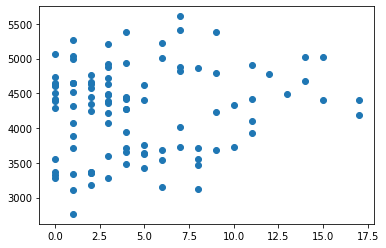

In [567]:
plt.scatter(df['Consults'],df['next_week_sales'])

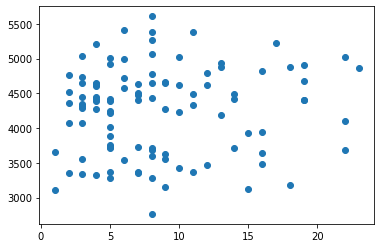

In [568]:
plt.scatter(df['New Client'],df['next_week_sales'])

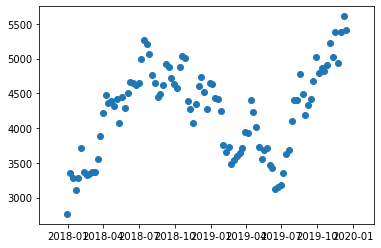

In [569]:
plt.scatter(df['Date'],df['next_week_sales'])

Plots above shows that new client and consults are not showing a clear pattern, but still might have some impacts on sales. Dates-sales pattern is pretty clear though. To make sure that date can be used to curve fitting, I convert dates into seconds after AD (Anno Domini), for example, 2017-12-30 is converted to 1.514592e+09 seconds.

In [570]:
date_in_sec = df['Date'].apply(lambda x:x.timestamp())
dff = df.copy()
dff['date_in_sec'] = date_in_sec
dff

,Date,Consults,New Client,Filled Hours,next_week_sales,date_in_sec
index,,,,,,
0,2017-12-30,1,8,2501,2764.0,1.514592e+09
1,2018-01-06,2,2,2764,3358.0,1.515197e+09
2,2018-01-13,0,8,3358,3287.0,1.515802e+09
3,2018-01-20,1,1,3287,3104.0,1.516406e+09
4,2018-01-27,3,5,3104,3276.0,1.517011e+09
5,2018-02-03,1,8,3276,3718.0,1.517616e+09
6,2018-02-10,2,11,3718,3373.0,1.518221e+09
7,2018-02-17,0,4,3373,3324.0,1.518826e+09
8,2018-02-24,1,3,3324,3341.0,1.519430e+09


Double check that pattern is still obvious after adjustment.

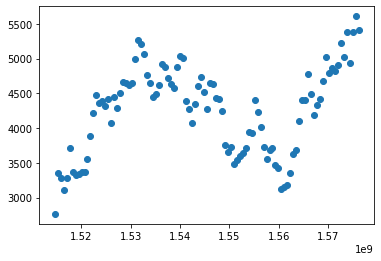

In [571]:
plt.scatter(dff['date_in_sec'],dff['next_week_sales'])

Codes below are for the purpose of curve fitting, finding the best formula to forecast sales.

In [572]:
def test_func(X, a, b, c, d, e,f,g,h):
    x,y,z = X
    return a*x**3 + b*x**2 + c*x + d*y**2 + e*y + f*z**2 + g*z +h
params, params_covariance = optimize.curve_fit(test_func, (dff['date_in_sec'],dff['Consults'],dff['New Client']), dff['next_week_sales'])
params

array([ 1.18962935e-19, -5.51688694e-10,  8.52752085e-01,  1.98210658e+00,
        7.52501256e-01,  5.70625649e-01, -1.24641369e+01, -4.39332765e+08])

The line below represents the fitted line for the data.

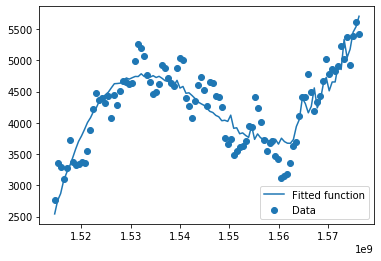

In [573]:
plt.figure(figsize=(6, 4))
plt.scatter(dff['date_in_sec'], dff['next_week_sales'], label='Data')
prediction = test_func((dff['date_in_sec'],dff['Consults'],dff['New Client']),params[0], params[1],params[2],params[3],params[4],params[5],params[6],params[7])
plt.plot(dff['date_in_sec'], prediction,label='Fitted function')

plt.legend(loc='best')

plt.show()

Model evalution... seems ok.

In [574]:
r2 = r2_score(prediction,dff['next_week_sales'])
RMSE = np.sqrt(mean_squared_error(prediction,dff['next_week_sales']))
print('R2 is ' + str(r2))
print('RMSE is ' + str(RMSE))

R2 is 0.7270090605212449
RMSE is 292.6832530513913


Conclusion:

We should convert current date into seconds after AD. Then the best formula I found is:


Sales = 1.18962935e-19 * seconds^3 - 5.51688694e-10 * seconds^2 + 8.52752085e-01 * seconds + 1.98210658e+00 * consults^2+
        7.52501256e-01 * consults + 5.70625649e-01 * new clients^2 - 1.24641369e+01 * new clients - 4.39332765e+08